In [ ]:
# An edited version of
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
# with
# authors:Mathieu Blondel
#         Jake Vanderplas
#         Christian Lorentzen
#         Malte Londschien
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)

# the range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [ ]:
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
# Select 20 data points for training at random and put them in order.
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

In [ ]:
X_train

array([[0.2020202 ],
       [0.70707071],
       [0.80808081],
       [1.31313131],
       [1.61616162],
       [2.22222222],
       [2.42424242],
       [2.62626263],
       [3.03030303],
       [3.33333333],
       [5.35353535],
       [5.45454545],
       [5.55555556],
       [7.37373737],
       [7.57575758],
       [7.87878788],
       [8.68686869],
       [9.29292929],
       [9.39393939],
       [9.5959596 ]])

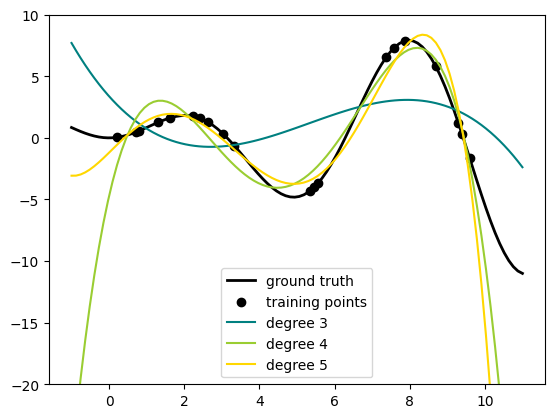

In [ ]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    # Pipeline: creates a pipeline of transforms with a final estimator.
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()